# EDA Diabetes Dataset

<p> In this project, I worked to analyze the diabetes dataset,examined the dataset and checked for missing values.  The dataset included various characteristics such as gender, age, blood pressure, heart disease, smoking history, body mass index (BMI), HbA1c level, and blood glucose level.</p>
I used various graphs to visualize the dataset.Scatter plots showed how diabetes was distributed by gender, blood pressure, heart disease, and smoking history. I also created a histogram that shows the prevalence of diabetes by age.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
#Path
current_dir=os.getcwd()
subfolder="Datasets"

In [3]:
df=pd.read_csv(os.path.join(current_dir,subfolder, 'diabetes.csv'))
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [4]:
#Data shape
print("Shape of DataFrame: ",df.shape)

Shape of DataFrame:  (100000, 9)


In [5]:
#Column Names
print("Columns: ",df.columns)

Columns:  Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')


In [6]:
#data types of each column
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB
None


In [7]:
#Data Summary
print(df.describe())

                 age  hypertension  heart_disease            bmi  \
count  100000.000000  100000.00000  100000.000000  100000.000000   
mean       41.885856       0.07485       0.039420      27.320767   
std        22.516840       0.26315       0.194593       6.636783   
min         0.080000       0.00000       0.000000      10.010000   
25%        24.000000       0.00000       0.000000      23.630000   
50%        43.000000       0.00000       0.000000      27.320000   
75%        60.000000       0.00000       0.000000      29.580000   
max        80.000000       1.00000       1.000000      95.690000   

         HbA1c_level  blood_glucose_level       diabetes  
count  100000.000000        100000.000000  100000.000000  
mean        5.527507           138.058060       0.085000  
std         1.070672            40.708136       0.278883  
min         3.500000            80.000000       0.000000  
25%         4.800000           100.000000       0.000000  
50%         5.800000           14

In [8]:
# Check for missing values
print("\n Missing Values:")
print(df.isnull().sum())


 Missing Values:
gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64


In [9]:
# Check for duplicate rows
print("\nDuplicate Rows:")
print(df.duplicated().sum())


Duplicate Rows:
3854


In [10]:
#Remove duplicated data
df = df.drop_duplicates(keep='first')
df.shape

(96146, 9)

never          34398
No Info        32887
former          9299
current         9197
not current     6367
ever            3998
Name: smoking_history, dtype: int64


<AxesSubplot: >

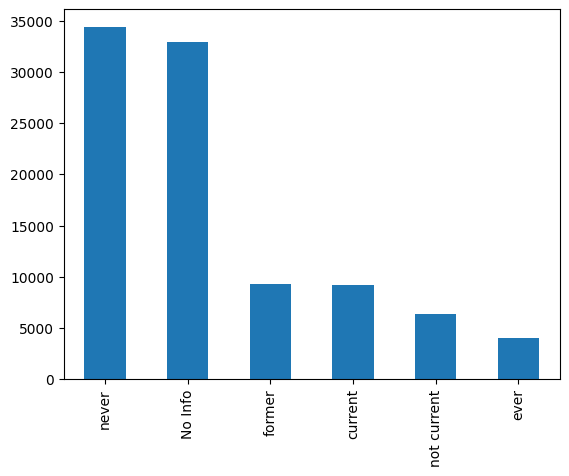

In [11]:
#find unique in smoking_history
print(df["smoking_history"].value_counts())
df["smoking_history"].value_counts().plot(kind="bar")

In [12]:
# delete No_info datas in Smoking_history Column
df = df[df['smoking_history'] != 'No Info']
df.shape

(63259, 9)

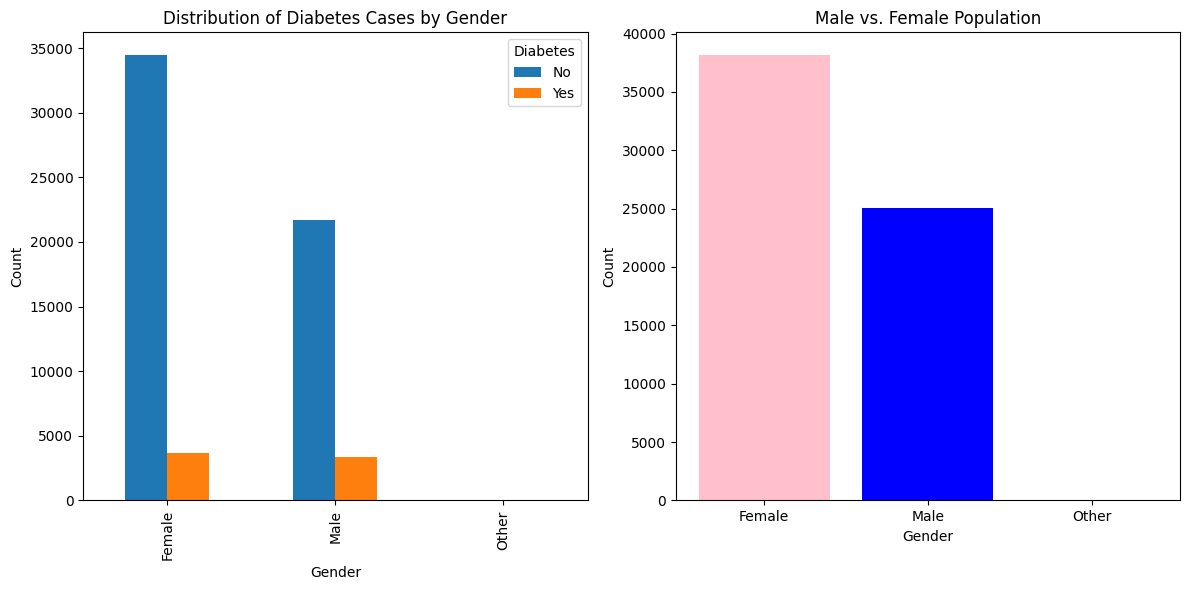

In [13]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
# Plot 1: Grouped bar plot - Distribution of diabetes cases by gender
diabetes_gender = df.groupby(['gender', 'diabetes']).size().unstack()
diabetes_gender.plot(kind='bar', stacked=False, ax=axes[0])
axes[0].set_xlabel('Gender')
axes[0].set_ylabel('Count')
axes[0].set_title('Distribution of Diabetes Cases by Gender')
axes[0].legend(title='Diabetes', labels=['No', 'Yes'])

# Plot 2: Bar plot - Male vs. Female population
gender_counts = df['gender'].value_counts()
colors = ['blue' if gender == 'Male' else 'pink' for gender in
gender_counts.index]
axes[1].bar(gender_counts.index, gender_counts.values, color=colors)
axes[1].set_xlabel('Gender')
axes[1].set_ylabel('Count')
axes[1].set_title('Male vs. Female Population')
plt.tight_layout()
plt.show()

In [14]:
#Filtering the DataFrame to include only entries where 'diabetes' is 1 
diabetic_population = df[df['diabetes'] == 1]

In [15]:
# Counting the diabetic population based on 'gender'
diabetic_gender_counts = diabetic_population['gender'].value_counts()
diabetic_gender_counts

Female    3700
Male      3337
Name: gender, dtype: int64

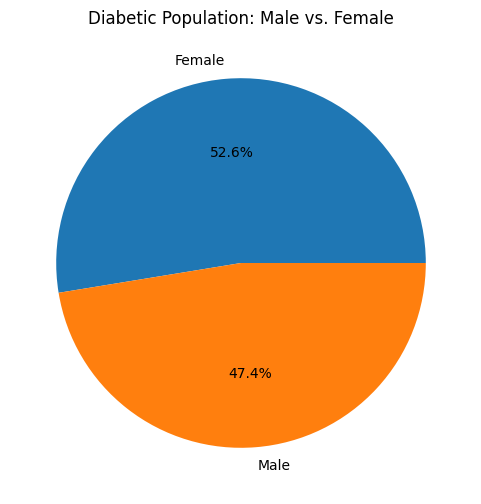

In [16]:
# Creating the pie chart
plt.figure(figsize=(6,6))
plt.pie(diabetic_gender_counts, labels=diabetic_gender_counts.index,
autopct='%1.1f%%')
plt.title('Diabetic Population: Male vs. Female')
plt.show()

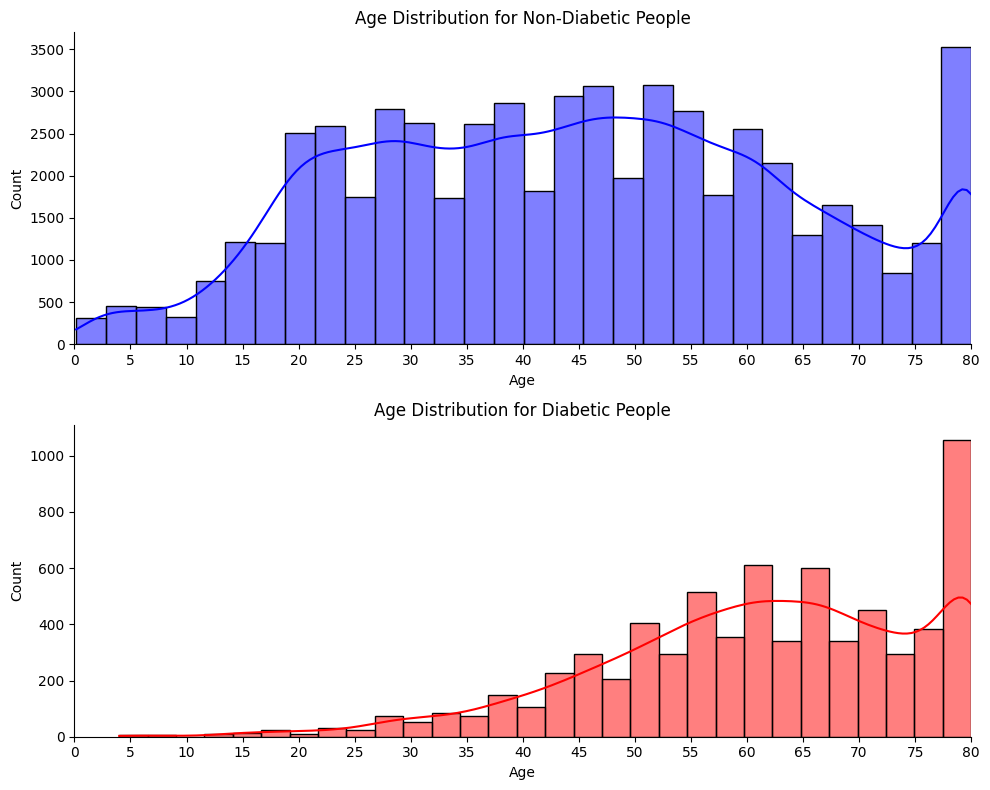

In [17]:
# Create a figure and a set of subplots
fig, axes = plt.subplots(2, 1, figsize=(10, 8))

# Plot 1: Histogram for non-diabetic people
sns.histplot(data=df[df['diabetes'] == 0], x='age', kde=True, bins=30,
ax=axes[0], color='blue')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Count')
axes[0].set_title('Age Distribution for Non-Diabetic People')
axes[0].set_xlim([0, df['age'].max()]) # Adjust x-axis limit
axes[0].set_xticks(range(0, int(df['age'].max()) + 1, 5)) # Set x-axis tick interval

# Plot 2: Histogram for diabetic people
sns.histplot(data=df[df['diabetes'] == 1], x='age', kde=True, bins=30,
ax=axes[1], color='red')
axes[1].set_xlabel('Age')
axes[1].set_ylabel('Count')
axes[1].set_title('Age Distribution for Diabetic People')
axes[1].set_xlim([0, df['age'].max()]) # Adjust x-axis limit
axes[1].set_xticks(range(0, int(df['age'].max()) + 1, 5)) # Set x-axis tick interval

# Remove top and right borders from both subplots
for ax in axes:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
# Adjust the space between subplots
plt.tight_layout()
# Display the plots
plt.show()


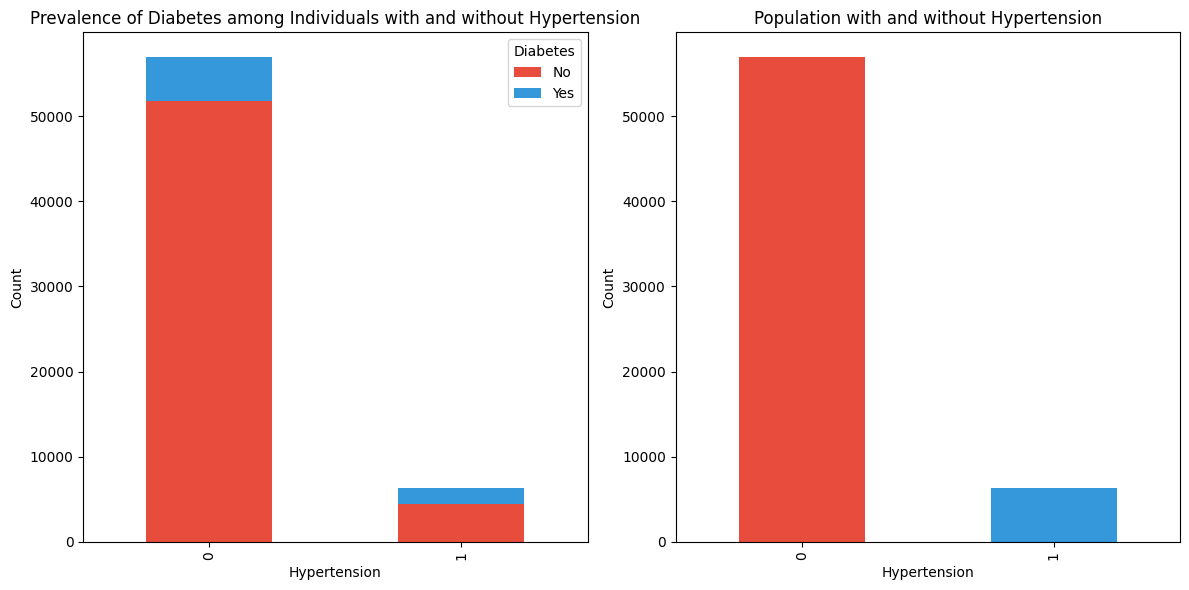

In [18]:
# Create a figure and a set of subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot 1: Bar plot - Prevalence of Diabetes among Individuals with and without Hypertension
df.groupby('hypertension')['diabetes'].value_counts().unstack().plot(kind='bar', stacked=True,
ax=axes[0], color=['#E74C3C', '#3498DB'])
axes[0].set_xlabel('Hypertension')
axes[0].set_ylabel('Count')
axes[0].set_title('Prevalence of Diabetes among Individuals with and without Hypertension')
axes[0].legend(title='Diabetes', labels=['No', 'Yes'])

# Plot 2: Bar plot - Population with and without Hypertension
df['hypertension'].value_counts().plot(kind='bar', ax=axes[1],color=['#E74C3C', '#3498DB'])
axes[1].set_xlabel('Hypertension')
axes[1].set_ylabel('Count')
axes[1].set_title('Population with and without Hypertension')

# Adjust spacing between subplots
plt.tight_layout()
# Display the plots
plt.show()

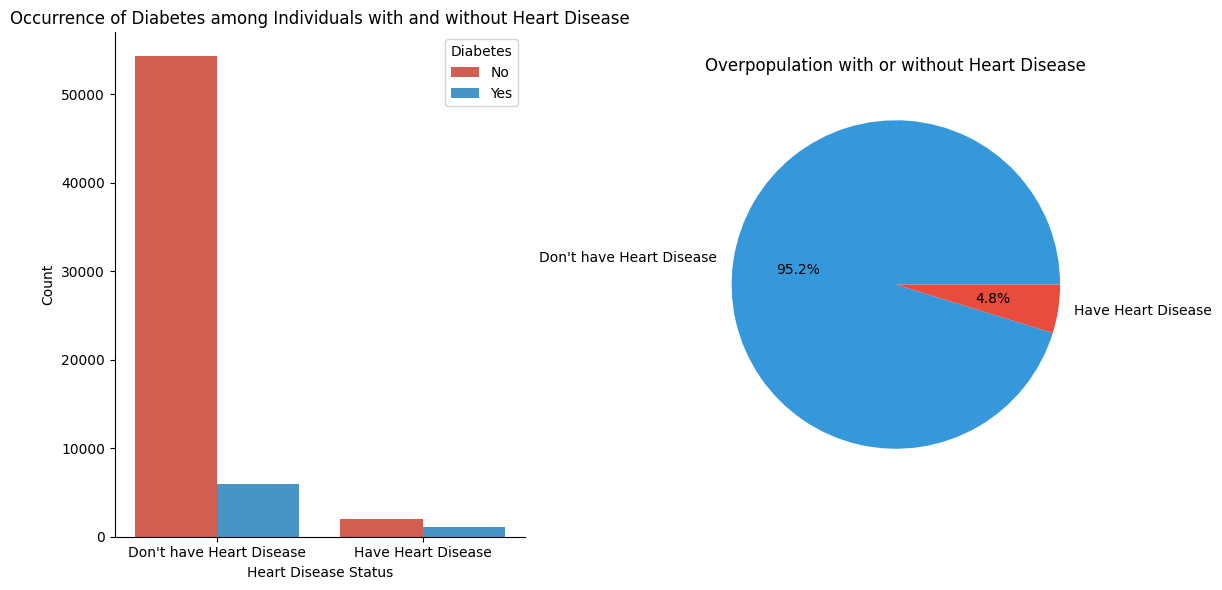

In [19]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
# Customize bar plot - Occurrence of Diabetes among Individuals with and without Heart Disease
sns.countplot(data=df, x='heart_disease', hue='diabetes',
palette=['#E74C3C', '#3498DB'], ax=axs[0])
axs[0].set_xlabel('Heart Disease Status')
axs[0].set_ylabel('Count')
axs[0].set_title('Occurrence of Diabetes among Individuals with and without Heart Disease')
axs[0].legend(title='Diabetes', labels=['No', 'Yes'])
axs[0].spines['top'].set_visible(False) # Remove top border
axs[0].spines['right'].set_visible(False) # Remove right border

# Customize x axis labels
labels = [item.get_text() for item in axs[0].get_xticklabels()]
labels[0] = 'Don\'t have Heart Disease'
labels[1] = 'Have Heart Disease'
axs[0].set_xticklabels(labels)

# Customize pie plot - Overpopulation with or without Heart Disease
heart_disease_counts = df['heart_disease'].value_counts()
axs[1].pie(heart_disease_counts, labels=labels, autopct='%1.1f%%',
colors=['#3498DB', '#E74C3C'])
axs[1].set_title('Overpopulation with or without Heart Disease')

# Adjust spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()

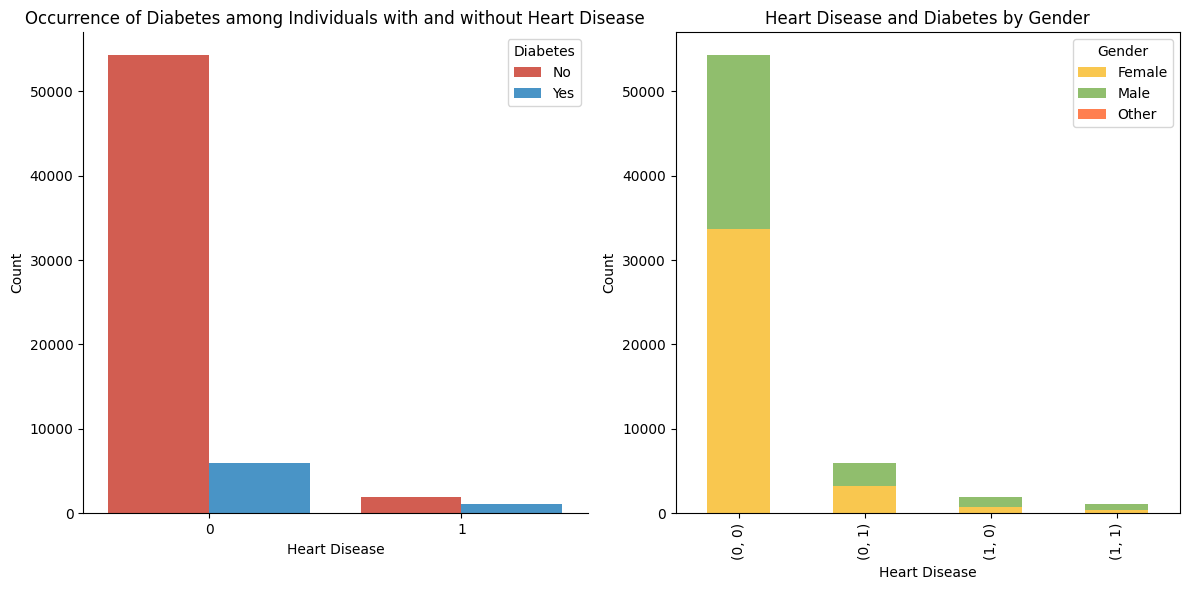

In [20]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
# Customize bar plot - Occurrence of Diabetes among Individuals with and without Heart Disease

sns.countplot(data=df, x='heart_disease', hue='diabetes',
palette=['#E74C3C', '#3498DB'], ax=axs[0])
axs[0].set_xlabel('Heart Disease')
axs[0].set_ylabel('Count')
axs[0].set_title('Occurrence of Diabetes among Individuals with and without Heart Disease')
axs[0].legend(title='Diabetes', labels=['No', 'Yes'])
axs[0].spines['top'].set_visible(False) # Remove top border
axs[0].spines['right'].set_visible(False) # Remove right border

# Customize stacked bar plot - Heart Disease and Diabetes by Gender
heart_diabetes_gender_counts = df.groupby(['heart_disease',
'diabetes', 'gender']).size().unstack().fillna(0)
heart_diabetes_gender_counts.plot(kind='bar', stacked=True, ax=axs[1],
color=['#F9C74F', '#90BE6D', '#FF7F50'])
axs[1].set_xlabel('Heart Disease')
axs[1].set_ylabel('Count')
axs[1].set_title('Heart Disease and Diabetes by Gender')
axs[1].legend(title='Gender')

# Adjust spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()

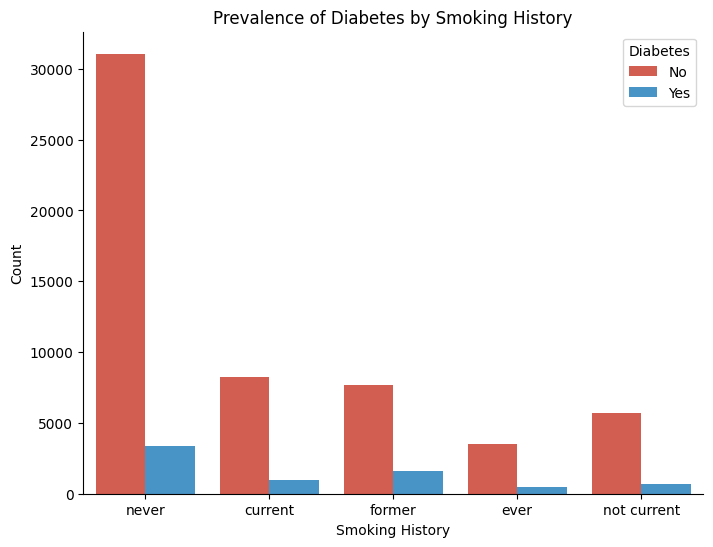

In [21]:
# Create the bar plot
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='smoking_history', hue='diabetes',
palette=['#E74C3C', '#3498DB'])
plt.xlabel('Smoking History')
plt.ylabel('Count')
plt.title('Prevalence of Diabetes by Smoking History')
plt.legend(title='Diabetes', labels=['No', 'Yes'])
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

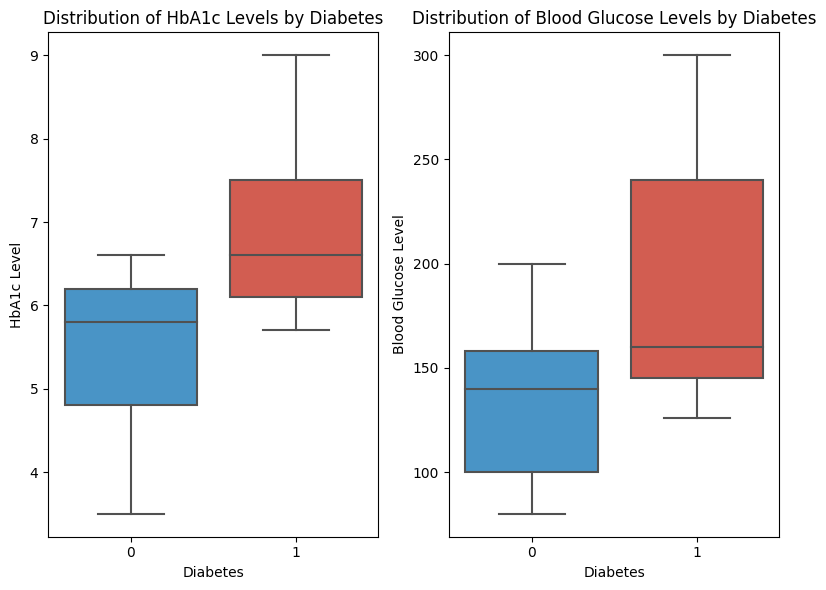

In [22]:
plt.figure(figsize=(12, 6))

# Box plot - HbA1c Levels by Diabetes
plt.subplot(1, 3, 1)
sns.boxplot(data=df, x='diabetes', y='HbA1c_level',
palette=['#3498DB', '#E74C3C'])
plt.xlabel('Diabetes')
plt.ylabel('HbA1c Level')
plt.title('Distribution of HbA1c Levels by Diabetes')

# Box plot - Blood Glucose Levels by Diabetes
plt.subplot(1, 3, 2)
sns.boxplot(data=df, x='diabetes', y='blood_glucose_level',
palette=['#3498DB', '#E74C3C'])
plt.xlabel('Diabetes')
plt.ylabel('Blood Glucose Level')
plt.title('Distribution of Blood Glucose Levels by Diabetes')

# Adjust spacing between subplots
plt.tight_layout()
# Display the plots
plt.show()

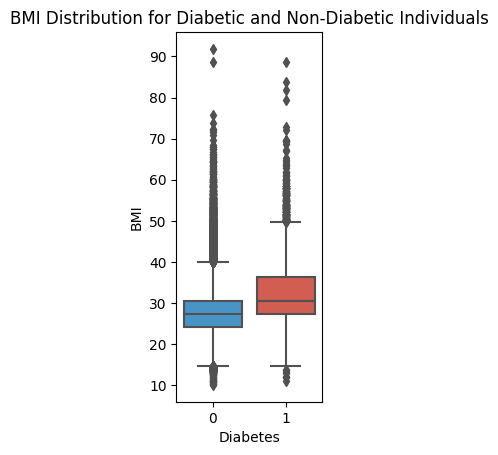

In [23]:
# Box plot - BMI Levels by Diabetes
plt.subplot(1, 3, 3)
sns.boxplot(data=df, x='diabetes', y='bmi', palette=['#3498DB','#E74C3C'])
plt.xlabel('Diabetes')
plt.ylabel('BMI')
plt.title('BMI Distribution for Diabetic and Non-Diabetic Individuals')
          
# Display the plots
plt.show()

In [24]:
correlation_matrix = df.corr()

C:\Users\Ganesh\AppData\Local\Temp\ipykernel_4584\4214245630.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


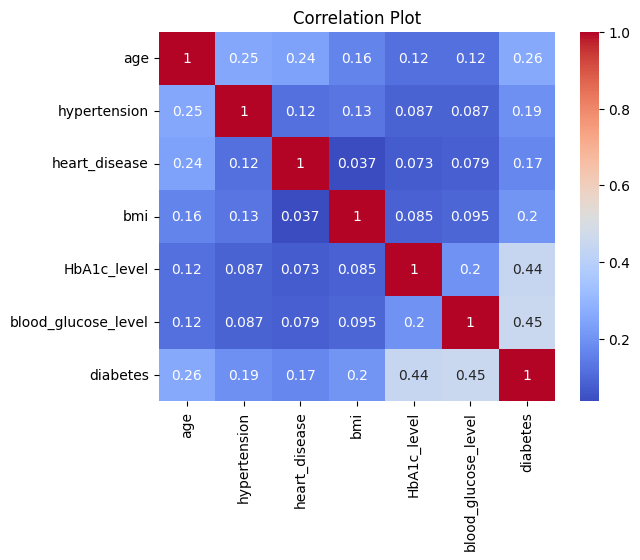

In [25]:
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Plot')
plt.show()


<h3> In this notebook I presented an EDA examining the distributions and relationships between many variables in the data. 